In [13]:
# Fake News Detector using Machine Learning Models
# Author: Ila Wallace
# Creation Date: 03/19/2025
# Last Updated: 04/05/2025

# This program is a fake news detector that utilizes machine learning 
# to analyze and classify news articles that may be either real or fake.
# The machine learning models used within this program include Naive Bayes, 
# Logistic Regression, Random Forest, and Support Vector Machine. To support 
# the models, TfidfVectorizer, KMeans, and RandomForestClassifier are used 
# to present the information in a usable way for some models and for others 
# to highlight the key features the models should consider as important 
# features. It also uses a simple function for preprocessing the plain text 
# data of the news articles in order to filter out unnecessary characters 
# and to make sure the text will be accepted by the models during the training 
# and testing phases. The two relevant files are named "fake_news.csv" and 
# "true_news.csv". 

# IMPORTANT: Please make sure you have the two files in the same folder or 
# location as this code, otherwise the program will not work. 

# Note: Do not run this cell. This is just for documentation purposes.

In [14]:
# Imports all the related libraries required for this python project to run correctly.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # sometimes, the matplotlib library requires more time to load for its fonts, but it will compile
import re as regex
import time as clock
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.cluster import KMeans as km
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.naive_bayes import MultinomialNB as nb
from sklearn.linear_model import LogisticRegression as lr
from sklearn.svm import LinearSVC as lsvm
from sklearn.tree import DecisionTreeClassifier as dt

print("The libraries and tools are ready for use.")

# Note: In order for this cell to run correctly, you must have all the libraries 
# listed above installed on your device or you must upload the files into Jupyter 
# Notebook. If any of the libraries listed above are not installed on your computer, 
# open the terminal or command prompt and use the 'pip install' command. 

# Ex. To install pandas, run the following command in your terminal:
# pip install pandas

The libraries and tools are ready for use.


In [15]:
# contains words that will be ignored during pre-processing of the text data
stop_words = { "a", "an", "are", "as", "and", "at", "but", "be", "by",
              "been", "for", "from", "had", "have", "has", "he", "her", 
              "his", "i", "if", "in", "is", "it", "its", "me", "my", "no", 
              "not", "of", "on", "or", "our", "she", "so", "some", "such", 
              "that", "the", "their", "them", "then", "there", "these", 
              "they", "this", "themselves", "those", "to", "too", "us", 
              "we", "were", "what", "with", "which", "will", "would",
              "you", "your", "yours", "yourself", "yourselves" }

# This function pre-processes the data found in the given datasets to not consider 
# common "stop words," meaning the words that don't actually add any real meaning 
# to the plain text, but are still necessary for the other words to convey the 
# meaning of a sentence or follow proper grammar rules.
def preprocess_plain_text(news_text):
    if pd.isna(news_text):
        return ""
    news_text = news_text.lower()
    news_text = regex.sub(r'[^\w\s]', '', news_text) # check this
    news_text = regex.sub(r'\d+', '', news_text) # check this
    plain_text = news_text.split()
    plain_text = [word for word in plain_text if word not in stop_words]
    return ' '.join(plain_text)

In [16]:
# Preparing the data for the models
true_news_df = pd.read_csv('./true-news.csv', encoding='utf-8', on_bad_lines='skip', engine='python')
fake_news_df = pd.read_csv('./fake-news.csv', encoding='utf-8', on_bad_lines='skip', engine='python')

true_news_df['label'] = 1
fake_news_df['label'] = 0

axes = ['Fake News', 'Real News']

news_df = pd.concat([true_news_df, fake_news_df], ignore_index=True)
news_df["text"] = news_df["text"].fillna('').apply(preprocess_plain_text)

print("Data preprocessing completed!\n")
print(news_df["label"].value_counts())
print(news_df.head())

Data preprocessing completed!

label
0    13553
1    12224
Name: count, dtype: int64
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  washington reuters head conservative republica...  politicsNews   
1  washington reuters transgender people allowed ...  politicsNews   
2  washington reuters special counsel investigati...  politicsNews   
3  washington reuters trump campaign adviser geor...  politicsNews   
4  seattlewashington reuters president donald tru...  politicsNews   

                 date  label  
0  December 31, 2017       1  
1  December 29, 2017       1  
2  December 31, 2017       1  
3  December 30, 2017       1  
4 

In [17]:
# Spliting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(news_df['text'], news_df['label'], test_size=0.2, random_state=42, stratify=news_df['label'])
print("\nTraining and testing data split completed!\n")

print("\nSample training data:\n", x_train.head())
print("\nSample testing data:\n", x_test.head())
print("\nSample training labels:\n", y_train.head())
print("\nSample testing labels:\n", y_test.head())


Training and testing data split completed!


Sample training data:
 1473     new york reuters former new york city congress...
4154     washington reuters president donald trump said...
10796    washington reuters president barack obama said...
1873     washington reuters president donald trump cong...
12007    kievchisinau reuters moldova recalled ambassad...
Name: text, dtype: object

Sample testing data:
 9566     geneva reuters hollywood actor michael douglas...
23835    group lawmakers planning request congressional...
21563    while honoring native american code talkers to...
9519     washington reuters woman center new york times...
24388    awesome kellyannepolls m sore winneri m winner...
Name: text, dtype: object

Sample training labels:
 1473     1
4154     1
10796    1
1873     1
12007    1
Name: label, dtype: int64

Sample testing labels:
 9566     1
23835    0
21563    0
9519     1
24388    0
Name: label, dtype: int64


In [18]:
# Vectorizing the plain text data and indentifying the important features
vectorize = TfidfVectorizer(max_features=1000, stop_words='english')
x_train_vector = vectorize.fit_transform(x_train.astype(str))
x_test_vector = vectorize.transform(x_test.astype(str))

print("\nVectorization completed!\n")

rainforest = rf(n_estimators=100, random_state=42)
rainforest.fit(x_train_vector, y_train)
features = rainforest.feature_importances_
indexes = np.argsort(features)[-200:]
best_features = vectorize.get_feature_names_out()[indexes]
x_top = x_train_vector[:, indexes]

print("Feature importance calculated!\n")
print("Top 200 features:\n", best_features) # check this

meank = km(n_clusters=5, random_state=42, n_init=10)
x_cluster = meank.fit_predict(x_top)

print("\nClustering completed!\n")


Vectorization completed!

Feature importance calculated!

Top 200 features:
 ['saturday' 'won' 'twitter' 'million' 'day' 'talking' 'truth' 'lot' 'fbi'
 'billion' 'love' 'completely' 'claimed' 'jan' 'north' 'posted' 'military'
 'media' 'candidate' 'absolutely' 'countries' 'campaign' 'tax' 'good'
 'say' 'spokeswoman' 'congress' 'country' 'police' 'sunday' 'morning'
 'union' 'source' 'china' 'financial' 'national' 'rival' 'senior'
 'proposed' 'capital' 'approved' 'white' 'bad' 'american' 'night' 'lives'
 'make' 'press' 'companies' 'statements' 'party' 'prime' 'shows' 'great'
 'nation' 'earlier' 'knows' 'talks' 'according' 'official' 'moscow'
 'election' 'security' 'doing' 'confirmed' 'department' 'week' 'measure'
 'court' 'want' 'person' 'happened' 'york' 'ruling' 'european' 'news'
 'realdonaldtrump' 'following' 'course' 'apparently' 'way' 'post' 'story'
 'woman' 'mr' 'entire' 'going' 'administration' 'says' 'today' 'foreign'
 'âitâs' 'obama' 'couldn' 'new' 'reported' 'representative' 'l

In [19]:
# This function evalutates a given model and prints out its performance metrics
def evaluate_model(name, model):
    model.fit(x_train_vector, y_train)
    y_predict = model.predict(x_test_vector)

    test_accuracy = accuracy_score(y_test, y_predict)
    train_accuracy = accuracy_score(y_train, model.predict(x_train_vector))
    class_report = classification_report(y_test, y_predict)
    cv_score = cross_val_score(model, x_train_vector, y_train, cv=5)
    cm = confusion_matrix(y_test, y_predict, labels=[0, 1])
    train_sizes, train_scores, test_scores = learning_curve(model, x_train_vector, y_train, cv=5)

    print(f"\n{name} Performance Metrics:\n")
    print(f"Testing Accuracy: {test_accuracy}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Cross-Validation Mean Accuracy: {cv_score.mean()} +/- {cv_score.std()}\n")
    print(f"{class_report}\n")

    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=axes)
    cm_display.plot(cmap=plt.cm.Blues)
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

    print("\n")
    
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Testing Score')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy Score')
    plt.title(f'Learning Curve for {name}')
    plt.legend()
    plt.show()


Naive Bayes Performance Metrics:

Testing Accuracy: 0.9569433669511249
Training Accuracy: 0.9592648271179866
Cross-Validation Mean Accuracy: 0.9581010845604444 +/- 0.0017616239363763013

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2711
           1       0.93      0.98      0.96      2445

    accuracy                           0.96      5156
   macro avg       0.96      0.96      0.96      5156
weighted avg       0.96      0.96      0.96      5156




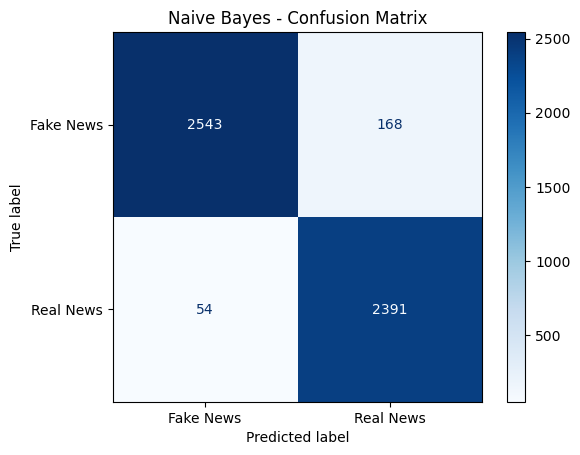

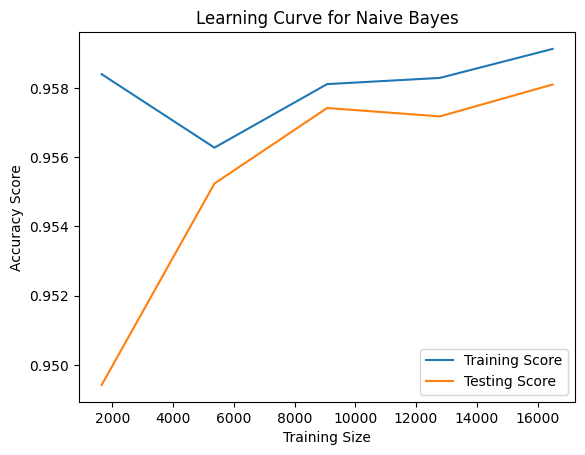


Execution time: 2.756999969482422 seconds


In [9]:
# Naive Bayes Model
start_time = clock.time()

navy_bay = nb()
evaluate_model("Naive Bayes", navy_bay)

end_time = clock.time()
execution_time = end_time - start_time
print(f"\nExecution time: {execution_time} seconds")


Logistic Regression Performance Metrics:

Testing Accuracy: 0.9687742435996897
Training Accuracy: 0.9687697007904563
Cross-Validation Mean Accuracy: 0.9669271375246156 +/- 0.0026201708953457227

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2711
           1       0.97      0.96      0.97      2445

    accuracy                           0.97      5156
   macro avg       0.97      0.97      0.97      5156
weighted avg       0.97      0.97      0.97      5156




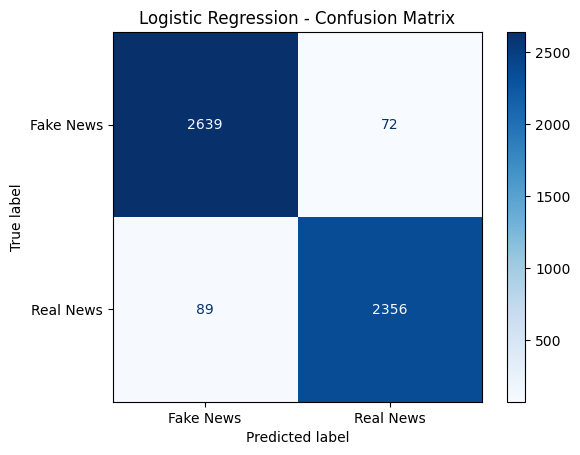

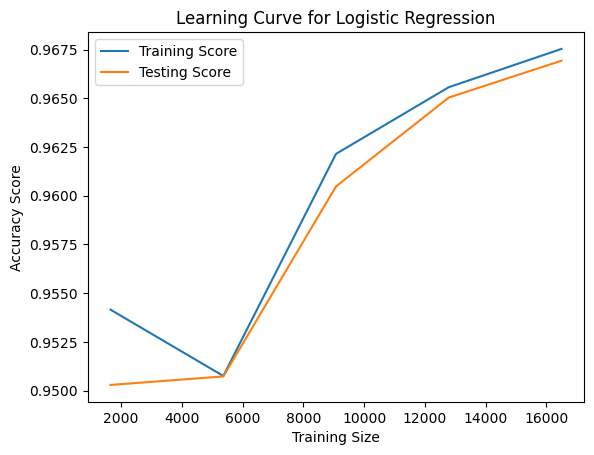


Execution time: 0.9230000972747803 seconds


In [10]:
# Logistic Regression Model
start_time = clock.time()

logger = lr(max_iter=1000, solver='liblinear', C=0.01)
evaluate_model("Logistic Regression", logger)

end_time = clock.time()
execution_time = end_time - start_time
print(f"\nExecution time: {execution_time} seconds")


Support Vector Machine Performance Metrics:

Testing Accuracy: 0.993599689681924
Training Accuracy: 0.9989816206779497
Cross-Validation Mean Accuracy: 0.9954415777562238 +/- 0.000831302330492252

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2711
           1       0.99      1.00      0.99      2445

    accuracy                           0.99      5156
   macro avg       0.99      0.99      0.99      5156
weighted avg       0.99      0.99      0.99      5156




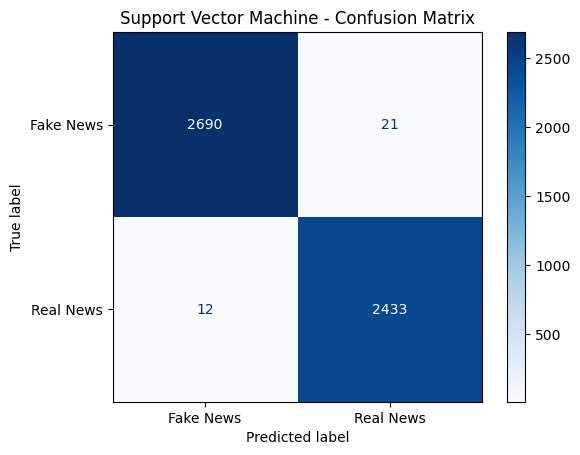

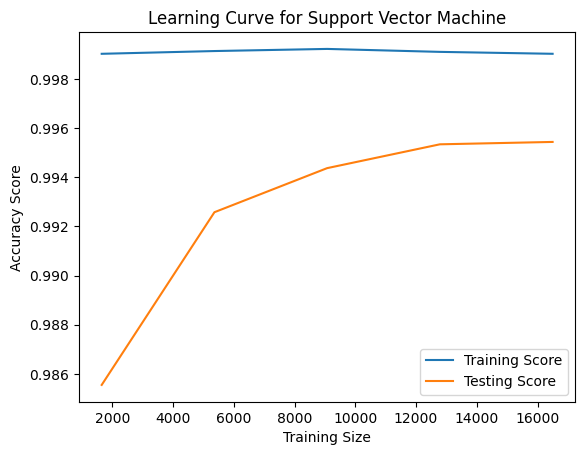


Execution time: 1.5260000228881836 seconds


In [20]:
# Support Vector Machine Model
start_time = clock.time()

supportor = lsvm(C=1, max_iter=1000)
evaluate_model("Support Vector Machine", supportor)

end_time = clock.time()
execution_time = end_time - start_time
print(f"\nExecution time: {execution_time} seconds")

# The execution time for this part will take around 300 to 500 seconds. This is why 


Decision Tree Performance Metrics:

Testing Accuracy: 0.9961210240496509
Training Accuracy: 0.9981572183696232
Cross-Validation Mean Accuracy: 0.996023560532581 +/- 0.001315284756806974

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2711
           1       1.00      1.00      1.00      2445

    accuracy                           1.00      5156
   macro avg       1.00      1.00      1.00      5156
weighted avg       1.00      1.00      1.00      5156




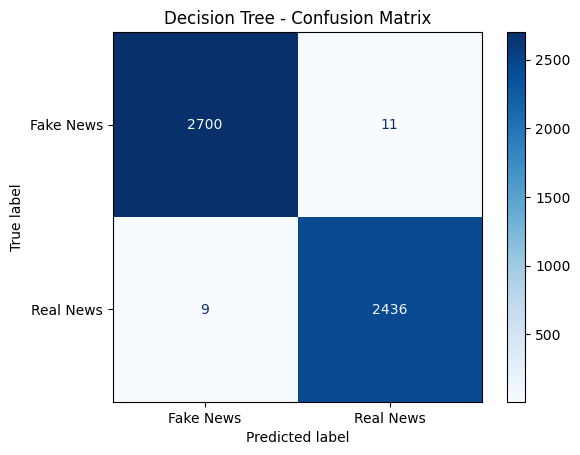

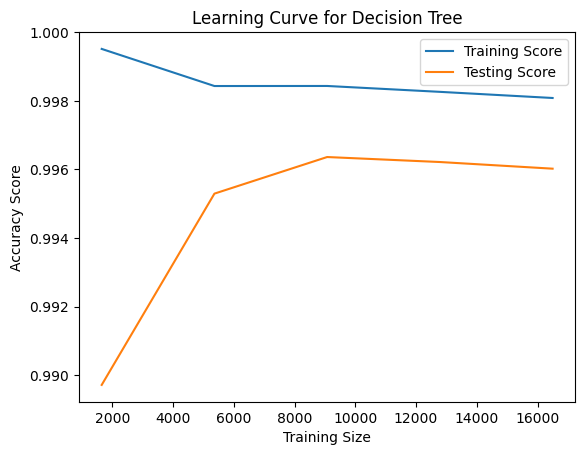


Execution time: 13.939000129699707 seconds


In [21]:
# Decision Tree Model
start_time = clock.time()

dectree = dt(max_depth=5, random_state=42)
evaluate_model("Decision Tree", dectree)

end_time = clock.time()
execution_time = end_time - start_time
print(f"\nExecution time: {execution_time} seconds")